In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from IPython.display import display


In [10]:
def carregar_imagens(pasta, tamanho=(128, 128), max_imgs=1000):
    imagens = []
    nomes = []

    for i, nome_arquivo in enumerate(os.listdir(pasta)):
        if not nome_arquivo.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        if i >= max_imgs:
            break
        caminho = os.path.join(pasta, nome_arquivo)
        try:
            img = Image.open(caminho).convert('RGB').resize(tamanho)
            vetor = np.array(img).flatten() / 255.0
            imagens.append(vetor)
            nomes.append(caminho)
        except Exception as e:
            print(f"Erro ao carregar {nome_arquivo}: {e}")
    
    return np.array(imagens), nomes


In [11]:
def treinar_modelo_knn(vetores, k=5):
    modelo = NearestNeighbors(n_neighbors=k, metric='cosine')
    modelo.fit(vetores)
    return modelo


In [12]:
def mostrar_recomendacoes(indice_base, modelo, vetores, nomes, k=5):
    distancias, indices = modelo.kneighbors([vetores[indice_base]])
    
    fig, axes = plt.subplots(1, k, figsize=(15, 5))
    fig.suptitle("Imagens recomendadas (mais semelhantes)")

    for i, idx in enumerate(indices[0]):
        img = Image.open(nomes[idx])
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"Rank {i+1}")

    plt.show()


Total de imagens carregadas: 40


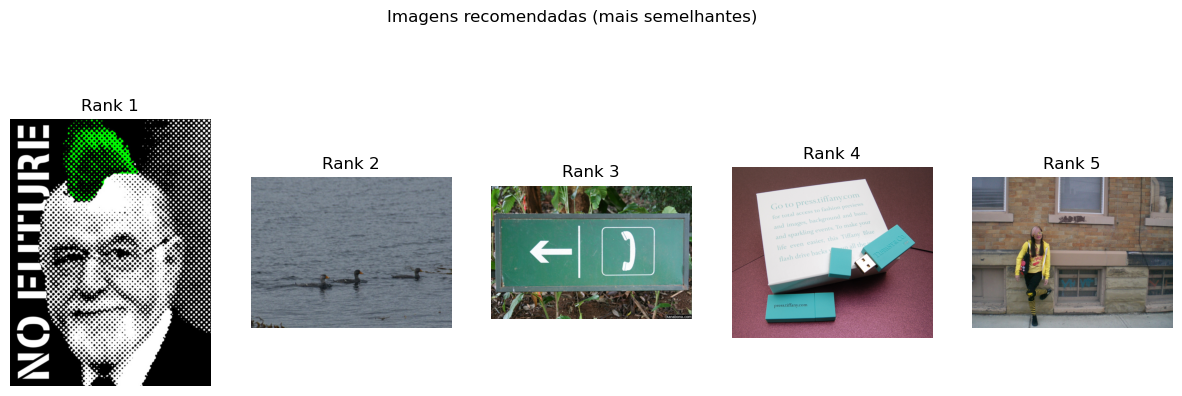

In [15]:

pasta_imagens = "/home/seixas/Imagens/ima_tray"

# Carregar
vetores, nomes = carregar_imagens(pasta_imagens)
print(f"Total de imagens carregadas: {len(vetores)}")


modelo_knn = treinar_modelo_knn(vetores, k=5)


indice_exemplo = 10
mostrar_recomendacoes(indice_exemplo, modelo_knn, vetores, nomes, k=5)


In [17]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(value=0, min=0, max=len(vetores)-1, step=1, description='Imagem:')
display(slider)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        mostrar_recomendacoes(change['new'], modelo_knn, vetores, nomes, k=5)

slider.observe(on_change)


IntSlider(value=0, description='Imagem:', max=39)